In [22]:
import tensorflow as tf

(X_train, Y_train),(X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [23]:
print(X_test)
print(Y_test.shape)


[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

In [24]:
import pandas as pd
from scipy.spatial.distance import cdist
import cv2
from sklearn.metrics import silhouette_score
from validclust import dunn
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#X_test2 = X_test
X_test = np.array([cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) for image in X_test])
print(X_test.shape)

(10000, 32, 32)


In [26]:
X_test2 = np.reshape(X_test,(10000,1024))
print(X_test2.shape)
row, col = X_test2.shape

(10000, 1024)


In [27]:
from sklearn.preprocessing import MinMaxScaler



In [28]:
#scaler = MinMaxScaler()
#X_TestN = scaler.fit_transform(X_test)
#print(X_TestN.shape)

In [29]:
X_TestN = X_test2.astype('float')/255

In [30]:
import random
cent = np.zeros(10)
for i in range(10):
    cent[i] = random.randint(1,row)
    

cent = cent.astype(int)
print(cent)

centroid = []

for i in range(10):
    centroid.append(X_TestN[cent[i]])


no_clusters = 10


[5937  839 1107 6420 9091 4970 2990 6198 4873 6340]


In [31]:
count = 0
labels = np.zeros(10000)

In [32]:
while count<100:
    cluster = []
    for j in range(10):
        cluster.append([])


    temp = np.zeros(10).reshape(-1,1)

    for k in range(row):
        for i in range(10):
            temp[i]  = np.linalg.norm(X_TestN[k] - centroid[i], axis = 0)


        index = np.argmin(temp, axis=0)
        cluster[int(index)].append(X_TestN[k])
        labels[k] = int(index)

    #print(len(cluster))


    centroid_new = []
    for i in range(10):
        centroid_new.append(np.mean(cluster[i], axis=0))

    #print(centroid_new)
    for i in range(10):
        flag = np.array_equal(centroid[i], centroid_new[i], equal_nan=False)
        if flag == True:
            break
    
    if flag == True:
        break
    else:
        centroid = centroid_new.copy()
        count=count+1
        
print(centroid_new)
print(count)
print(labels)

[array([0.81432033, 0.80917603, 0.81219982, ..., 0.75638907, 0.75784865,
       0.76210068]), array([0.61284115, 0.61066404, 0.61475867, ..., 0.53175848, 0.53220497,
       0.53659381]), array([0.30320276, 0.29500659, 0.29576794, ..., 0.60483603, 0.59512994,
       0.58956233]), array([0.23385417, 0.22965686, 0.23013685, ..., 0.30330882, 0.29748264,
       0.29788603]), array([0.73921192, 0.7425641 , 0.75206259, ..., 0.37822775, 0.37841252,
       0.38277149]), array([0.50439636, 0.50093871, 0.50881084, ..., 0.54257185, 0.53775144,
       0.53611685]), array([0.23266063, 0.23327432, 0.23607304, ..., 0.29389847, 0.29086035,
       0.28703994]), array([0.79974969, 0.7959379 , 0.80038206, ..., 0.46014536, 0.46616604,
       0.47494456]), array([0.42564465, 0.42611392, 0.43025008, ..., 0.38918326, 0.39030809,
       0.39146121]), array([0.85307315, 0.84905103, 0.85349422, ..., 0.81202237, 0.81315988,
       0.81474987])]
29
[8. 7. 4. ... 6. 3. 1.]


In [33]:
final = silhouette_score(X_TestN, labels)

In [35]:
print(final)

0.0608802288657418


In [36]:
print("Dunn's Index:", davies_bouldin_score(X_TestN, labels))
    


Dunn's Index: 2.737724171154885


In [37]:
X_train = np.array([cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) for image in X_train])
print(X_train.shape)
X_train = np.reshape(X_train,(50000,1024))
print(X_train.shape)
row, col = X_train.shape
X_TrainN = X_train.astype('float')/255

(50000, 32, 32)
(50000, 1024)


In [38]:
from sklearn.cluster import KMeans
from keras import Model
from keras import activations
from keras.layers import Input, Dense, Conv2D, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from keras.losses import binary_crossentropy

In [39]:
x = Input(shape=(1024,), name='input')
def create_encoder(x):
    x = Dense(1024, activation=activations.relu, name="Layer1")(x)
    x = Dense(512, activation=activations.relu, name="Layer2")(x)
    x = Dense(256, activation=activations.relu, name="Layer3")(x)
    x = Dense(32, activation=activations.relu, name="Bottleneck")(x)
    return x


def create_decoder(x):
    x = Dense(256, activation=activations.relu, name="Layer5")(x)
    x = Dense(512, activation=activations.relu, name="Layer6")(x)
    x = Dense(1024, activation=activations.relu, name="Layer7")(x)
    x = Reshape((32,32,1))(x)
    return x
    

encoder = create_encoder(x)
decoder = create_decoder(encoder)

autoencoder = Model(x, decoder)
autoencoder.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1024)]            0         
_________________________________________________________________
Layer1 (Dense)               (None, 1024)              1049600   
_________________________________________________________________
Layer2 (Dense)               (None, 512)               524800    
_________________________________________________________________
Layer3 (Dense)               (None, 256)               131328    
_________________________________________________________________
Bottleneck (Dense)           (None, 32)                8224      
_________________________________________________________________
Layer5 (Dense)               (None, 256)               8448      
_________________________________________________________________
Layer6 (Dense)               (None, 512)               1315

In [40]:
Y_Decoded = X_TrainN.reshape(50000,32,32,1)
output = autoencoder.fit(X_TrainN, Y_Decoded, epochs=20, batch_size=256)

Epoch 1/20
196/196 [==============================] - 12s 51ms/step - loss: 1.4235 - accuracy: 0.0076
Epoch 2/20
196/196 [==============================] - 6s 29ms/step - loss: 0.9850 - accuracy: 0.0086
Epoch 3/20
196/196 [==============================] - 5s 27ms/step - loss: 0.7968 - accuracy: 0.0089
Epoch 4/20
196/196 [==============================] - 5s 27ms/step - loss: 0.7335 - accuracy: 0.0091
Epoch 5/20
196/196 [==============================] - 5s 27ms/step - loss: 0.7186 - accuracy: 0.0091
Epoch 6/20
196/196 [==============================] - 11s 57ms/step - loss: 0.7009 - accuracy: 0.0092
Epoch 7/20
196/196 [==============================] - 15s 77ms/step - loss: 0.6841 - accuracy: 0.0092
Epoch 8/20
196/196 [==============================] - 15s 76ms/step - loss: 0.6747 - accuracy: 0.0092
Epoch 9/20
196/196 [==============================] - 15s 77ms/step - loss: 0.6754 - accuracy: 0.0092
Epoch 10/20
196/196 [==============================] - 15s 76ms/step - loss: 0.6774 - 

In [41]:
print(X_test.shape)

(10000, 32, 32)


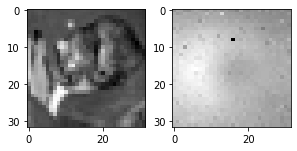

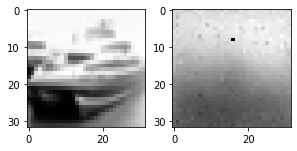

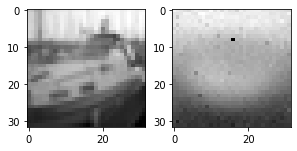

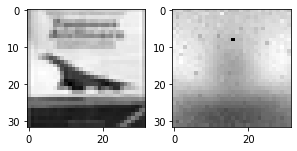

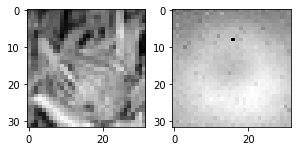

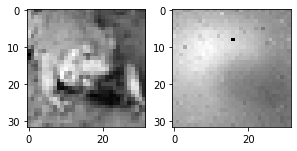

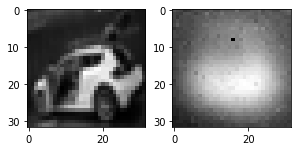

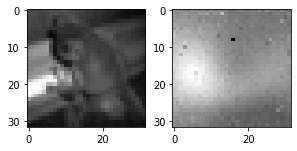

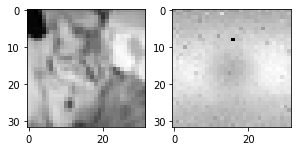

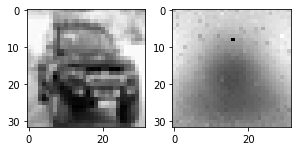

In [191]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
i = 10
auto_output = autoencoder.predict(X_test2[:i])
auto_output = (auto_output * 255).astype('int32')
auto_output = auto_output.reshape(auto_output.shape[0], 32, 32)

for a in range(i):
    fig=plt.figure(figsize=(10,10))
    fig.add_subplot(4,4,1)
    imshow(X_test[a], cmap=plt.get_cmap('gray'))
    fig.add_subplot(4,4,2)
    imshow(auto_output[a], cmap=plt.get_cmap('gray'))

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

encoding_model = Model(x, encoder)
encoding_pred = encoding_model.predict(X_TrainN)


In [43]:
KMeans_for_encoding = KMeans(n_clusters=10)
KMeans_labels_pred = KMeans_for_encoding.fit_predict(encoding_pred)

In [44]:
score = silhouette_score(encoding_pred, KMeans_labels_pred)
print(score)

0.16624467
